# Project: Evaluation of the Performance of Single Index Model (SIMs)

In this `project,` you'll calculate statistical properties, i.e., stylized facts of historical return data, and compare those to those properties calculated using single index models. First, we'll compute the excess return for all tickers in the dataset and filter out the `SPY` excess return. Then, we'll compute the excess return distributions of the single-index models (from the `SPY` excess return) and test their properties using the models computed from the `module-3` worked example. Finally, we'll compare the properties of the excess returns calculated from historical data with excess returns computed using single index models. 


### Tasks
* __Prerequisites__: we'll begin by loading the historical dataset. The data we'll explore is daily open-high-low-close values for firms in the [S&P500 index](https://en.wikipedia.org/wiki/S%26P_500) between `01-03-2018` and `12-01-2023`.
* __Task 1__: Compute the excess return for all tickers in the dataset, including `SPY` (our `market` portfolio).
* __Task 2__: Then, we'll compute the excess return distribution for all single index models in our collection and visualize the data's return distribution versus the single index model.
* __Task 3__: Finally, we'll develop tests to compute the similarity of the `data` versus `single-index` return distributions and compare some statistical properties.

## Setup
We set up the computational environment by including the `Include.jl` file. The `Include.jl` file loads external packages, various functions that we will use in the exercise, and custom types to model the components of our lab problem.
* For additional information on functions and types used in this material, see the [Julia programming language documentation](https://docs.julialang.org/en/v1/) and the [VLQuantitativeFinancePackage.jl documentation](https://github.com/varnerlab/VLQuantitativeFinancePackage.jl). 

In [1]:
include("Include.jl");

    Updating git-repo `https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git`
   Resolving package versions...
  No Changes to `~/Desktop/julia_work/CHEME-130-eCornell-Repository/courses/CHEME-135/module-3/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-130-eCornell-Repository/courses/CHEME-135/module-3/Manifest.toml`
Precompiling project...
  ✓ KernelFunctions
  1 dependency successfully precompiled in 2 seconds. 260 already precompiled.
  Activating project at `~/Desktop/julia_work/CHEME-130-eCornell-Repository/courses/CHEME-135/module-3`
  No Changes to `~/Desktop/julia_work/CHEME-130-eCornell-Repository/courses/CHEME-135/module-3/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-130-eCornell-Repository/courses/CHEME-135/module-3/Manifest.toml`
    Updating registry at `~/.julia/registries/General.toml`
    Updating git-repo `https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git`
  No Changes to `~/Desktop/julia_work/CHEME-130-eCornell-Reposit

## __Prerequisites__: Load and clean the historical dataset
We gathered a daily open-high-low-close `dataset` for each firm in the [S&P500](https://en.wikipedia.org/wiki/S%26P_500) from `01-03-2018` until `10-31-2023`, along with data for a few exchange-traded funds and volatility products during that time. We load the `orignal_dataset` by calling the `MyMarketDataSet()` function:

In [2]:
original_dataset = MyMarketDataSet() |> x-> x["dataset"];

### Clean the data
Not all of the tickers in our dataset have the maximum number of trading days for various reasons, e.g., acquistion or de-listing events. Let's collect only those tickers with the maximum number of trading days.

* First, let's compute the number of records for a company that we know has a maximim value, e.g., `AAPL` and save that value in the `maximum_number_trading_days` variable:

In [3]:
maximum_number_trading_days = original_dataset["AAPL"] |> nrow;

Now, iterate through our data and collect only tickers with `maximum_number_trading_days` records. Save that data in the `dataset::Dict{String,DataFrame}` variable:

In [4]:
dataset = Dict{String,DataFrame}();
for (ticker,data) ∈ original_dataset
    if (nrow(data) == maximum_number_trading_days)
        dataset[ticker] = data;
    end
end
dataset;

Let's get a list of firms that we have in cleaned up `dataset`, and save it in the `all_tickers` array

In [5]:
all_tickers = keys(dataset) |> collect |> sort;

Finally, let's set some constant values, e.g., a value for the `risk_free_rate`:

In [6]:
risk_free_rate = 0.05;

## __Task 1__: Compute the excess annual return for all tickers in the historical dataset
The expected return $\mathbb{E}(r_{i})$ will be used in our single index model calculations, so we'll provide values for these items for the entire dataset (all `N = 459` tickers).

* First, compute the expected (annualized) log excess return by passing the `dataset`, the entire list of firms we have in the dataset (held in the $N\times{1}$ `all_tickers` array) and the annualized risk-free rate to the `log_return_matrix(...)` method. 
* The result will be stored in the `all_firms_excess_return_matrix` variable, a $T-1\times{N}$ array of log return values. Each row of `all_firms_excess_return_matrix` corresponds to a time-value, while each column corresponds to a firm:

In [7]:
all_firms_excess_return_matrix = log_return_matrix(dataset, all_tickers, 
    Δt = (1.0/252.0), risk_free_rate = risk_free_rate);

In [8]:
all_firms_excess_return_matrix

1488×460 Matrix{Float64}:
  0.324988   1.87928      6.97769   …   5.75159     1.74882    2.00452
  2.13987   -0.668139     3.97037       3.95668    -0.761936   2.9259
  0.886321  -1.96617     -0.853754      2.84928    -0.405978   2.41921
  6.15162    1.46203     -1.92102       6.55558     5.0984     3.36373
 -3.52638    4.87131     -0.317677      1.76502     3.3169    -4.92013
 -0.37572   10.2317       2.75668   …  10.6817      2.19034    2.43203
  3.25669    9.91413      7.32109       5.80955     2.34702    3.10105
 -0.219697   1.23539     -1.56874       2.67067    -1.60483    1.057
  1.64849   -0.305863     1.90851       0.389849   -0.152035   2.79631
  0.1633     0.0879042   -0.533602     -0.210856   -0.555564  -1.14091
  2.96852   -1.0269       3.81638   …  -0.0978694   2.23925    0.942827
  0.863209  -0.736871     0.950174      0.232196    1.8414     1.43424
  1.05596    0.0469966    1.8355        2.40996     1.35743    1.7796
  ⋮                                 ⋱                 

Next, we estimate the expected growth for each firm from the `all_firms_return_matrix` using the `mean(...)` function, which is exported by the [Statistics.jl package](https://docs.julialang.org/en/v1/stdlib/Statistics/). We set the $N\times{1}$ vector of expected values, i.e., $\mathbb{E}(r_{1}),\dotsc,\mathbb{E}(r_{N})$ in the variable $\mu$:

In [9]:
μ = mean(all_firms_excess_return_matrix, dims=1) |> vec;

Finally, because we use the excess return of `SPY` in the `single-index` model calculations, we must find its index in the `all_firms_excess_return_matrix`  (and save this in the `index_of_SPY` variable): 

In [10]:
index_of_SPY = findfirst(x-> x=="SPY", all_tickers)

377

Next, get the `SPY` excess return time series (and store it in the `Rₘ` variable):

In [11]:
Rₘ = all_firms_excess_return_matrix[:,index_of_SPY];

## __Task 2__: Compute the excess annual return the for single-index models in our collection

In [12]:
sim_dictionary = load(joinpath(_PATH_TO_DATA,"SIMs-SP500-01-03-18-to-12-01-23.jld2")) |> x-> x["sim"] 

Dict{String, MySingleIndexModel} with 460 entries:
  "NI"   => MySingleIndexModel(-0.0709014, 0.652585, 0.05, Normal{Float64}(μ=7.…
  "EMR"  => MySingleIndexModel(-0.0587296, 1.23319, 0.05, Normal{Float64}(μ=6.4…
  "CTAS" => MySingleIndexModel(0.117183, 1.1806, 0.05, Normal{Float64}(μ=-5.372…
  "HSIC" => MySingleIndexModel(-0.0922378, 0.912801, 0.05, Normal{Float64}(μ=-5…
  "KIM"  => MySingleIndexModel(-0.0837113, 1.28542, 0.05, Normal{Float64}(μ=-7.…
  "PLD"  => MySingleIndexModel(0.0128753, 1.02335, 0.05, Normal{Float64}(μ=8.53…
  "IEX"  => MySingleIndexModel(-0.0153656, 0.962861, 0.05, Normal{Float64}(μ=-5…
  "BAC"  => MySingleIndexModel(-0.0965471, 1.3254, 0.05, Normal{Float64}(μ=-1.3…
  "CBOE" => MySingleIndexModel(-0.00806882, 0.591552, 0.05, Normal{Float64}(μ=1…
  "EXR"  => MySingleIndexModel(-0.00384653, 0.720622, 0.05, Normal{Float64}(μ=1…
  "NCLH" => MySingleIndexModel(-0.351379, 2.32966, 0.05, Normal{Float64}(μ=1.38…
  "CVS"  => MySingleIndexModel(-0.0931302, 0.783931, 0.05,

In [13]:
excess_return_sims = Array{Float64,2}(undef, length(sim_dictionary), length(Rₘ));
for i ∈ eachindex(all_tickers)

    ticker = all_tickers[i];
    sim_model_ticker = sim_dictionary[ticker];
    α = sim_model_ticker.α
    β = sim_model_ticker.β
    ϵ = sim_model_ticker.ϵ
    R_ticker = sim_model_ticker(sort(Rₘ), 100) |> x-> mean(x,dims=2)

    for j ∈ eachindex(Rₘ)
       excess_return_sims[i,j] = R_ticker[j] 
    end
end
excess_return_sims;

#### Visualize `your` ticker of choice:

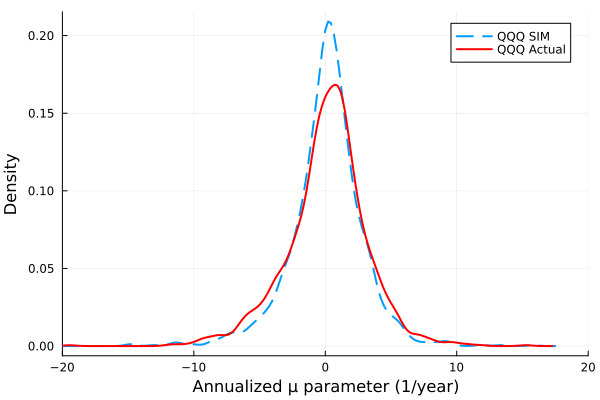

In [14]:
ticker_to_visualize = "QQQ"
index_to_visualize = findfirst(x->x==ticker_to_visualize, all_tickers)
density(excess_return_sims[index_to_visualize,:], lw=2, 
    label="$(ticker_to_visualize) SIM", ls=:dash)
density!(all_firms_excess_return_matrix[:,index_to_visualize], 
    c=:red, xlims=(-20.0,20.0), 
    label="$(ticker_to_visualize) Actual", xlabel="Annualized μ parameter (1/year)", 
    ylabel="Density", lw=2)

## __Task 3__: Compute the similarity and statistical properties of the returns

In [48]:
ticker_to_analyze = "QQQ";

In [39]:
Rᵢ = all_firms_excess_return_matrix[:,findfirst(x-> x==ticker_to_analyze, all_tickers)];

In [40]:
sim_model_ticker = sim_dictionary[ticker_to_analyze];
R̄ᵢ = sim_model_ticker(Rₘ, 1000) |> x-> mean(x,dims=2) |> vec;

### Autocorrelation

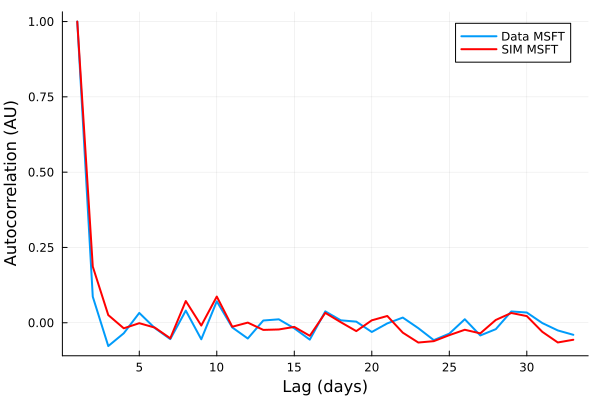

In [41]:
plot(autocor(Rᵢ),lw=2, label="Data $(ticker_to_analyze)")
plot!(autocor(R̄ᵢ),lw=2, c=:red, label="SIM $(ticker_to_analyze)")
xlabel!("Lag (days)",fontsize=18)
ylabel!("Autocorrelation (AU)", fontsize=18)

###  Volatility clustering
Large market swings, e.g., crashes or booms, tend to bunch up, followed by periods of relative calm. This isn't just chance; it follows from fear, optimism, news shocks, and investor behavior. When one big event occurs, it can send ripples that destabilize the market, making further volatility more likely.

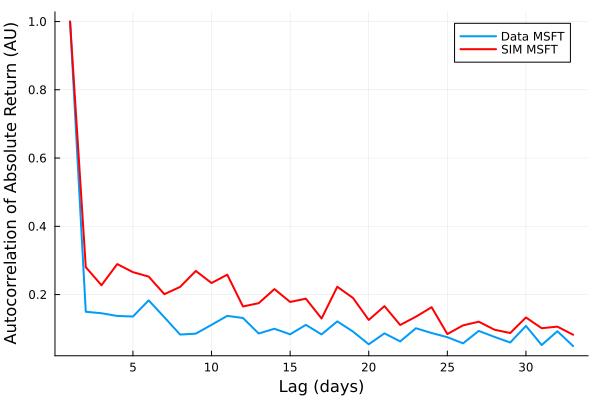

In [42]:
plot(autocor(abs.(Rᵢ)),lw=2, label="Data $(ticker_to_analyze)")
plot!(autocor(abs.(R̄ᵢ)),lw=2, c=:red, label="SIM $(ticker_to_analyze)")
xlabel!("Lag (days)",fontsize=18)
ylabel!("Autocorrelation of Absolute Return (AU)", fontsize=18)

### Similarity

In [46]:
d = SqExponentialKernel();
d(sort(Rᵢ), sort(R̄ᵢ))

1.296e-320

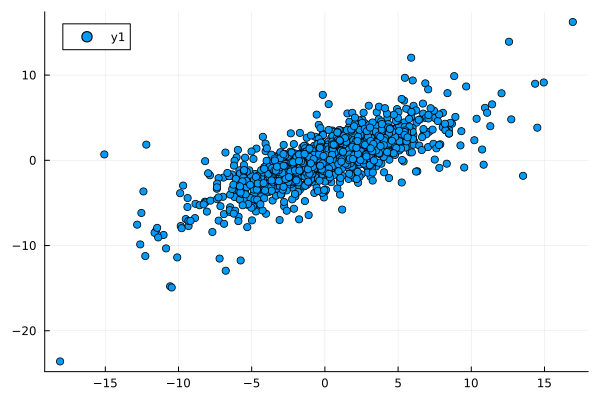

In [43]:
scatter(Rᵢ, R̄ᵢ)

In [47]:
cor(Rᵢ, R̄ᵢ)

0.7658290609289435

## Disclaimer and Risks

__This content is offered solely for training and informational purposes__. No offer or solicitation to buy or sell securities or derivative products or any investment or trading advice or strategy is made, given, or endorsed by the teaching team.

__Trading involves risk__. Carefully review your financial situation before investing in securities, futures contracts, options, or commodity interests. Past performance, whether actual or indicated by historical tests of strategies, is no guarantee of future performance or success. Trading is generally inappropriate for someone with limited resources, investment or trading experience, or a low-risk tolerance. Only risk capital that is not required for living expenses.

__You are fully responsible for any investment or trading decisions you make__. Such decisions should be based solely on evaluating your financial circumstances, investment or trading objectives, risk tolerance, and liquidity needs.